# 1. Definição do Problema

## Identificação de Alunos em Risco de Abandono

A identificação de alunos em risco de abandono escolar ou de baixo desempenho acadêmico é uma área crítica onde a ciência de dados pode fazer uma grande diferença. 
Esse tipo de análise pode ajudar educadores e administradores a tomar medidas proativas para apoiar esses alunos.

Utilizaremos dados acadêmicos como: notas, frequências e localização para tentar prever alunos com potênciais riscos de abandono, dessa forma, dando a possibilidade das escolas, professores, diretores, etc a desenvolver medidas para reverter esse quadro de abandono a tempo.


## Dados 

O dados utilizados nessa análise são da Secretária de Educação do Ceará que inclui dados de várias escolas estaduais. Nenhum dados será disponibilizado, todo dados só será usado para geração de análises e apresentação da solução proposta. Todo dados utilizado neste trabalho é de propriedade da SEDUC e não poderar ser compartilhado.

Os dados utilizados são todos reais e foram obtidos com o consentimento da SEDUC através de consultas ao banco de produção.

Descrição dos dados


### Fontes de Dados:

* Abandonos
* Dados Acadêmicos: Notas, frequência.
* Dados Demográficos: Idade, gênero, localização.

### Formato original do dado

quebrei as colunas em várias tabelas para visualizar os dados de forma mais simples. 

<b>Atenção:</b> os dados abaixo são dados gerados e embaralhados e não representa um aluno real.

OBS: abaixo é a versão final do dado inicial, porém tentei vários formatos anteriormente e acabei optando por fazer a extração final nesse formado. 

| ci\_aluno | nr\_anoletivo | fl\_sexo | aluno\_municipio\_id | aluno\_estado | aluno\_municipio\_latitude | aluno\_municipio\_longitude | ci\_turma |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 20874 | 2023 | M | 1769 | CE | -6.7993799 | -39.3390944 | 894465 |

---

| cd\_etapa | cd\_turno | ci\_unidade\_trabalho | unidade\_trabalho\_latitude | unidade\_trabalho\_longitude | ci\_areatrabalho | nr\_cargahoraria | nr\_nota\_1 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 162 | 4 | 438 | -6.221425 | -39.395795 | 14 | 8 | 6 |

---

| nr\_nota\_2 | nr\_nota\_3 | nr\_nota\_4 | nr\_nota\_5 | nr\_mediafinal | nr\_mediaanual | nr\_faltasjan | nr\_faltasfev |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 6 | 6 | 6 | null | 6 | 6 | 2 | 13 |

---

| nr\_faltasmar | nr\_faltasabr | nr\_faltasmai | nr\_faltasjun | nr\_faltasjul | nr\_faltasago | nr\_faltasset | nr\_faltasout |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 32 | 20 | 27 | 22 | null | 26 | 22 | 24 |

---

| nr\_faltasnov | nr\_faltasdez | abandonou |
| :--- | :--- | :--- |
| 26 | 23 | false |


<b>OBS:</b> Contudo nesse formato ainda existe uma grande quantidade do dado que não estava sendo possível processar na minha máquina, então acabei optando por pagar o plano do colab para conseguir uma máquina com mais memória para conseguir fazer o processamento inicial do dado lá reduzindo esse dado de maneira que fosse possível continuar o trabalho localmente na minha máquina. Os dados carregado no item 2 a seguir já é esse dado trabalhado, agrupado e reduzido através de um pré-processamento do dado descrito abaixo.

# 2. Coleta e Pré-processamento de Dados

## Instalação das dependências

In [5]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install pyarrow
%pip install fastparquet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

## Carregamento dos dados

In [6]:
import pandas as pd
import numpy as np

# dados já tratados previamente para conseguir processar com a memória disponível
df = pd.read_parquet('datasets/dados-com-features.parquet')
print(df.columns)
pd.set_option('display.max_columns', None)

# preenche nr_faltasjan_pt até nr_faltasdez_pt com 0
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

# preenchendo colunas de faltas com 0 pois quando n tem falta a informação n é registrada
for i in range(0, 12):
    df['nr_faltas' + meses[i] + '_pt'] = df['nr_faltas' + meses[i] + '_pt'].fillna(0)
    df['nr_faltas' + meses[i] + '_mat'] = df['nr_faltas' + meses[i] + '_mat'].fillna(0)

del meses
del i

df.head()


Index(['ci_aluno', 'fl_sexo', 'aluno_municipio_id', 'aluno_estado',
       'aluno_municipio_latitude', 'aluno_municipio_longitude', 'ci_turma',
       'cd_etapa', 'cd_turno', 'ci_unidade_trabalho',
       'unidade_trabalho_latitude', 'unidade_trabalho_longitude', 'abandonou',
       'nr_cargahoraria_mat', 'nr_cargahoraria_pt', 'nr_faltasabr_mat',
       'nr_faltasabr_pt', 'nr_faltasago_mat', 'nr_faltasago_pt',
       'nr_faltasdez_mat', 'nr_faltasdez_pt', 'nr_faltasfev_mat',
       'nr_faltasfev_pt', 'nr_faltasjan_mat', 'nr_faltasjan_pt',
       'nr_faltasjul_mat', 'nr_faltasjul_pt', 'nr_faltasjun_mat',
       'nr_faltasjun_pt', 'nr_faltasmai_mat', 'nr_faltasmai_pt',
       'nr_faltasmar_mat', 'nr_faltasmar_pt', 'nr_faltasnov_mat',
       'nr_faltasnov_pt', 'nr_faltasout_mat', 'nr_faltasout_pt',
       'nr_faltasset_mat', 'nr_faltasset_pt', 'nr_mediaanual_mat',
       'nr_mediaanual_pt', 'nr_mediafinal_mat', 'nr_mediafinal_pt',
       'nr_nota_1_mat', 'nr_nota_1_pt', 'nr_nota_2_mat', '

,ci_aluno,fl_sexo,aluno_municipio_id,aluno_estado,aluno_municipio_latitude,aluno_municipio_longitude,ci_turma,cd_etapa,cd_turno,ci_unidade_trabalho,unidade_trabalho_latitude,unidade_trabalho_longitude,abandonou,nr_cargahoraria_mat,nr_cargahoraria_pt,nr_faltasabr_mat,nr_faltasabr_pt,nr_faltasago_mat,nr_faltasago_pt,nr_faltasdez_mat,nr_faltasdez_pt,nr_faltasfev_mat,nr_faltasfev_pt,nr_faltasjan_mat,nr_faltasjan_pt,nr_faltasjul_mat,nr_faltasjul_pt,nr_faltasjun_mat,nr_faltasjun_pt,nr_faltasmai_mat,nr_faltasmai_pt,nr_faltasmar_mat,nr_faltasmar_pt,nr_faltasnov_mat,nr_faltasnov_pt,nr_faltasout_mat,nr_faltasout_pt,nr_faltasset_mat,nr_faltasset_pt,nr_mediaanual_mat,nr_mediaanual_pt,nr_mediafinal_mat,nr_mediafinal_pt,nr_nota_1_mat,nr_nota_1_pt,nr_nota_2_mat,nr_nota_2_pt,nr_nota_3_mat,nr_nota_3_pt,nr_nota_4_mat,nr_nota_4_pt,nr_nota_5_mat,nr_nota_5_pt,nr_anoletivo
0,1,F,1422.0,CE,-3.498221,-39.582102,773692,125,4,3146,-3.531454,-39.711247,False,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,8.666667,8.5,8.666667,8.500,8.000000,8.0,8.000000,9.000,9.000,8.500,8.666667,NaN,NaN,2021
1,2,F,1422.0,CE,-3.498221,-39.582102,773694,126,1,3146,-3.531454,-39.711247,False,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.500000,8.0,7.500000,8.250,7.250000,8.0,7.875000,7.500,7.750,7.500,7.000000,NaN,NaN,2021
2,27,F,1125.0,CE,-2.904865,-40.120302,751724,163,1,131,-2.899620,-40.223960,False,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8.5,9.000000,8.5,9.000000,8.225,8.833333,9.0,8.500000,8.925,9.500,8.375,9.333333,NaN,NaN,2021
3,58,M,1526.0,CE,-5.113505,-38.372942,760313,125,5,6768,NaN,NaN,False,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.333333,6.0,6.333333,6.000,6.000000,6.5,6.666667,6.000,6.000,6.000,6.000000,NaN,NaN,2021
4,98,F,1126.0,CE,-6.103561,-39.462628,804514,126,1,9147,NaN,NaN,False,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.000000,7.0,7.000000,6.500,6.875000,6.5,7.125000,7.000,6.625,7.500,7.625000,NaN,NaN,2021


In [7]:
df.shape

(4464978, 54)

In [8]:
# exibir quantidade de valores null por coluna
df.isnull().sum()


ci_aluno                            0
fl_sexo                             0
aluno_municipio_id              10329
aluno_estado                    10329
aluno_municipio_latitude        15359
aluno_municipio_longitude       15359
ci_turma                            0
cd_etapa                            0
cd_turno                            0
ci_unidade_trabalho                 0
unidade_trabalho_latitude     2817397
unidade_trabalho_longitude    2817397
abandonou                           0
nr_cargahoraria_mat            117784
nr_cargahoraria_pt              27665
nr_faltasabr_mat                    0
nr_faltasabr_pt                     0
nr_faltasago_mat                    0
nr_faltasago_pt                     0
nr_faltasdez_mat                    0
nr_faltasdez_pt                     0
nr_faltasfev_mat                    0
nr_faltasfev_pt                     0
nr_faltasjan_mat                    0
nr_faltasjan_pt                     0
nr_faltasjul_mat                    0
nr_faltasjul

In [9]:
# df[df['ci_aluno'] == 1]

df['cd_etapa'].value_counts()

cd_etapa
162    411760
163    386797
164    350168
128    334849
129    334815
127    323584
126    309742
125    288140
123    276863
124    274271
121    272064
122    270417
183    113796
184     86289
194     81097
185     78273
195     73688
186     72798
196     41435
175     29174
181     13473
213     12793
214      8826
180      8566
177      4774
172      2150
174      1381
182       833
189       569
176       486
190       291
80        245
191       211
173       193
193       117
79         50
Name: count, dtype: int64

## Distribuição do dado

In [10]:
# exiba como está a distribuição do dataset de abandonos
df['abandonou'].value_counts()

abandonou
False    4439519
True       25459
Name: count, dtype: int64

In [11]:
df['fl_sexo'].value_counts()

fl_sexo
M    2260441
F    2204537
Name: count, dtype: int64

In [12]:
# 1: 'Tarde',
# 2: 'Noite',
# 3: 'Flexível',
# 4: 'Manhã',
# 5: 'Integral (45h)',
# 6: 'NUNCA ESTUDOU',
# 7: 'Intermediário',
# 8: 'Integral (35h M/T)',
# 9: 'Integral (35h T/N)',
# 10: 'Integral (40h)'

df['cd_turno'].value_counts()

cd_turno
4     1567404
1     1517333
5      880545
2      359719
10      78388
8       48542
9        7593
7        3702
3        1752
Name: count, dtype: int64

In [13]:
df['aluno_estado'].value_counts()

aluno_estado
CE    4449619
RN       2619
PE       1588
PI        427
PB        155
SE         68
TO         38
SP         34
MG         23
BA         20
AM         17
PA          8
AP          7
SC          7
DF          6
RJ          6
GO          2
RS          2
AL          2
MA          1
Name: count, dtype: int64

## Pré-processamento

### Converte estado para valor binário se é ou não do ceará

In [14]:
# cria uma coluna is_ceara onde 1 é ceará e 0 é outro estado
df['is_ceara'] = df['aluno_estado'].map({
    'CE': 1
})
df['is_ceara'] = df['is_ceara'].fillna(0)
df = df.drop(columns=['aluno_estado'])

### Converte fl_sexo para valor numerico

In [15]:
# converte fl_sexo para valor numerico
#  0: 'M'
#  1: 'F',
df['fl_sexo'] = df['fl_sexo'].map({
    'M': 0,
    'F': 1
})

### Renumera turno para seguir sequencia logica

In [16]:
# ANTIGO
# 1: 'Tarde',
# 2: 'Noite',
# 3: 'Flexível',
# 4: 'Manhã',
# 5: 'Integral (45h)',
# 6: 'NUNCA ESTUDOU',
# 7: 'Intermediário',
# 8: 'Integral (35h M/T)',
# 9: 'Integral (35h T/N)',
# 10: 'Integral (40h)'

# NOVO
# -1: 'NUNCA ESTUDOU',
# 1: 'Manhã',
# 2: 'Tarde',
# 3: 'Noite',
# 4: 'Flexível',
# 5: 'Intermediário',
# 6: 'Integral (35h M/T)',
# 7: 'Integral (35h T/N)',
# 8: 'Integral (40h)'
# 9: 'Integral (45h)',

df['turno'] = df['cd_turno'].map({1: 2, 2: 3, 3: 4, 4: 1, 5: 9, 6: -1, 7: 5, 8: 6, 9: 7, 10: 8})
df = df.drop(columns=['cd_turno'])

#### Renumeração das etapas por ordem lógica

In [17]:
# MAPEAMENTO de ETAPAS
# 1	 = 180	Creche (0 a 3 anos)
# 2	 = 182	Unificada (0 a 5 anos)
# 3	 = 181	Pré-escola (4 e 5 anos)
# 4	 = 177	Educação Infantil e Ensino Fundamental Multietapa
# 5	 = 121	1º Ano
# 6	 = 122	2º Ano
# 7	 = 123	3º Ano
# 8	 = 124	4º Ano
# 9	 = 125	5º Ano
# 10 = 126	6º Ano
# 11 = 127	7º Ano
# 12 = 128	8º Ano
# 13 = 129	9º Ano
# 14 = 79	Aceleração (9 a 11 anos) EF
# 15 = 80	Aceleração (12 a 14 anos) EF
# 16 = 162	1ª Série
# 17 = 163	2ª Série
# 18 = 164	3ª Série
# 19 = 184	Integrado 1ª Série
# 20 = 185	Integrado 2ª Série
# 21 = 186	Integrado 3ª Série
# 22 = 189	Normal/Magistério 2ª Série
# 23 = 190	Normal/Magistério 3ª Série
# 24 = 191	Normal/Magistério 4ª Série
# 25 = 193	Educação Profissional (Subsequente)
# 26 = 172	EJA Semipresencial - Anos iniciais
# 27 = 174	EJA Semipresencial - Anos finais
# 28 = 176	EJA Semipresencial - Anos iniciais e Anos finais
# 29 = 173	EJA Semipresencial - Ensino Médio
# 30 = 194	EJA Presencial - Anos iniciais
# 31 = 195	EJA Presencial - Anos finais
# 32 = 175	EJA Presencial - Anos iniciais e Anos finais
# 33 = 196	EJA Presencial - Ensino Médio
# 34 = 213	EJA Mais Qualificação Profissional I
# 35 = 214	EJA Mais Qualificação Profissional II
# 36 = 183	Multi

df['etapa'] = df['cd_etapa'].map({
    79: 14, 80: 15, 121: 5, 122: 6, 123: 7, 124: 8, 125: 9, 126: 10, 127: 11, 128: 12, 129: 13, 162: 16,
    163: 17, 164: 18, 172: 26, 173: 29, 174: 27, 175: 32, 176: 28, 177: 4, 180: 1, 181: 3, 182: 2, 183: 36,
    184: 19, 185: 20, 186: 21, 189: 22, 190: 23, 191: 24, 193: 25, 194: 30, 195: 31, 196: 33, 213: 34, 214: 35
})

df = df.drop(columns=['cd_etapa'])

### Processamento de notas

#### Removendo médias pois já temos as notas dos periodos

In [18]:
# remove campos de médias de notas pois são redundantes
df = df.drop(columns=['nr_mediafinal_pt', 'nr_mediafinal_mat', 'nr_mediaanual_pt', 'nr_mediaanual_mat'])
df.columns

Index(['ci_aluno', 'fl_sexo', 'aluno_municipio_id', 'aluno_municipio_latitude',
       'aluno_municipio_longitude', 'ci_turma', 'ci_unidade_trabalho',
       'unidade_trabalho_latitude', 'unidade_trabalho_longitude', 'abandonou',
       'nr_cargahoraria_mat', 'nr_cargahoraria_pt', 'nr_faltasabr_mat',
       'nr_faltasabr_pt', 'nr_faltasago_mat', 'nr_faltasago_pt',
       'nr_faltasdez_mat', 'nr_faltasdez_pt', 'nr_faltasfev_mat',
       'nr_faltasfev_pt', 'nr_faltasjan_mat', 'nr_faltasjan_pt',
       'nr_faltasjul_mat', 'nr_faltasjul_pt', 'nr_faltasjun_mat',
       'nr_faltasjun_pt', 'nr_faltasmai_mat', 'nr_faltasmai_pt',
       'nr_faltasmar_mat', 'nr_faltasmar_pt', 'nr_faltasnov_mat',
       'nr_faltasnov_pt', 'nr_faltasout_mat', 'nr_faltasout_pt',
       'nr_faltasset_mat', 'nr_faltasset_pt', 'nr_nota_1_mat', 'nr_nota_1_pt',
       'nr_nota_2_mat', 'nr_nota_2_pt', 'nr_nota_3_mat', 'nr_nota_3_pt',
       'nr_nota_4_mat', 'nr_nota_4_pt', 'nr_nota_5_mat', 'nr_nota_5_pt',
       'nr_anol

#### Preenchendo nota 5 que é a recuperação com -1 pois não são todos os alunos que fazem recuperação.

In [19]:
# preencha nr_nota_5_pt e nr_nota_5_mat com -1
df['nr_nota_5_pt'] = df['nr_nota_5_pt'].fillna(-1)
df['nr_nota_5_mat'] = df['nr_nota_5_mat'].fillna(-1)

#### Preenchendo notas faltantes com zeros pois da nota 1 até nota 4 se n foi lançado é porque o aluno não fez, sendo equivalente a zero.

In [20]:
for i in range(1, 5):
    df['nr_nota_' + str(i) + '_pt'] = df['nr_nota_' + str(i) + '_pt'].fillna(0)
    df['nr_nota_' + str(i) + '_mat'] = df['nr_nota_' + str(i) + '_mat'].fillna(0)

### Preenchimento de latitude e longitude faltantes

In [21]:
df[['aluno_municipio_latitude', 'aluno_municipio_longitude', 'unidade_trabalho_latitude', 'unidade_trabalho_longitude']].isnull().sum()

aluno_municipio_latitude        15359
aluno_municipio_longitude       15359
unidade_trabalho_latitude     2817397
unidade_trabalho_longitude    2817397
dtype: int64

#### Preenche latitude e longitude null de alunos com latitute e logitude da escola e vice versa. pois normalmente o aluno mora proximo da escola onde estuda.

In [22]:
# para as colunas aluno_municipio_latitude e aluno_municipio_longitude preencha com a unidade_trabalho_latitude e unidade_trabalho_longitude
df['aluno_municipio_latitude'] = df['aluno_municipio_latitude'].fillna(df['unidade_trabalho_latitude'])
df['aluno_municipio_longitude'] = df['aluno_municipio_longitude'].fillna(df['unidade_trabalho_longitude'])

df['unidade_trabalho_latitude'] = df['unidade_trabalho_latitude'].fillna(df['aluno_municipio_latitude'])
df['unidade_trabalho_longitude'] = df['unidade_trabalho_longitude'].fillna(df['aluno_municipio_longitude'])

df[['aluno_municipio_latitude', 'aluno_municipio_longitude', 'unidade_trabalho_latitude', 'unidade_trabalho_longitude']].isnull().sum()

aluno_municipio_latitude      10830
aluno_municipio_longitude     10830
unidade_trabalho_latitude     10830
unidade_trabalho_longitude    10830
dtype: int64

#### Deleta dados restantes que não foi possível preencher


Como desses dados nulos 100% são de alunos que não abandonaram, podemos deletar essas linhas pois já temos bastante amostras dessa situação para o treinamento isso vai até ajudar a diminuir o desbalanceamento do dataset

In [23]:
df[df['aluno_municipio_latitude'].isnull()]['abandonou'].value_counts()

abandonou
False    10830
Name: count, dtype: int64

In [24]:
# delete os registros que não possuem latitude e longitude
df = df.dropna(subset=['aluno_municipio_latitude', 'aluno_municipio_longitude', 'unidade_trabalho_latitude', 'unidade_trabalho_longitude'])

### Preenchimento de cargas horárias faltantes

In [25]:
# preencha nr_cargahoraria_pt e nr_cargahoraria_mat com a média
df['nr_cargahoraria_pt'] = df['nr_cargahoraria_pt'].fillna(df['nr_cargahoraria_pt'].mean())
df['nr_cargahoraria_mat'] = df['nr_cargahoraria_mat'].fillna(df['nr_cargahoraria_mat'].mean())

#### Deleta ids

In [26]:
df = df.drop(columns=['aluno_municipio_id', 'ci_turma', 'ci_unidade_trabalho'])

## 2. Análise Exploratória de Dados (EDA)
* Visualização de Dados: Utilizar gráficos para identificar padrões e outliers.
* Estatísticas Descritivas: Média, mediana, desvio padrão das variáveis importantes.
* Correlação: Análise de correlação para entender as relações entre diferentes variáveis.

In [27]:
# exiba a quantidade de valores faltantes no dataset
print('Abandonos\n########')
print('Total', df.size)

print('\nValores faltantes')
print(df.isnull().sum())


Abandonos
########
Total 209344956

Valores faltantes
ci_aluno                      0
fl_sexo                       0
aluno_municipio_latitude      0
aluno_municipio_longitude     0
unidade_trabalho_latitude     0
unidade_trabalho_longitude    0
abandonou                     0
nr_cargahoraria_mat           0
nr_cargahoraria_pt            0
nr_faltasabr_mat              0
nr_faltasabr_pt               0
nr_faltasago_mat              0
nr_faltasago_pt               0
nr_faltasdez_mat              0
nr_faltasdez_pt               0
nr_faltasfev_mat              0
nr_faltasfev_pt               0
nr_faltasjan_mat              0
nr_faltasjan_pt               0
nr_faltasjul_mat              0
nr_faltasjul_pt               0
nr_faltasjun_mat              0
nr_faltasjun_pt               0
nr_faltasmai_mat              0
nr_faltasmai_pt               0
nr_faltasmar_mat              0
nr_faltasmar_pt               0
nr_faltasnov_mat              0
nr_faltasnov_pt               0
nr_faltasout_mat  

### Matriz Correlação

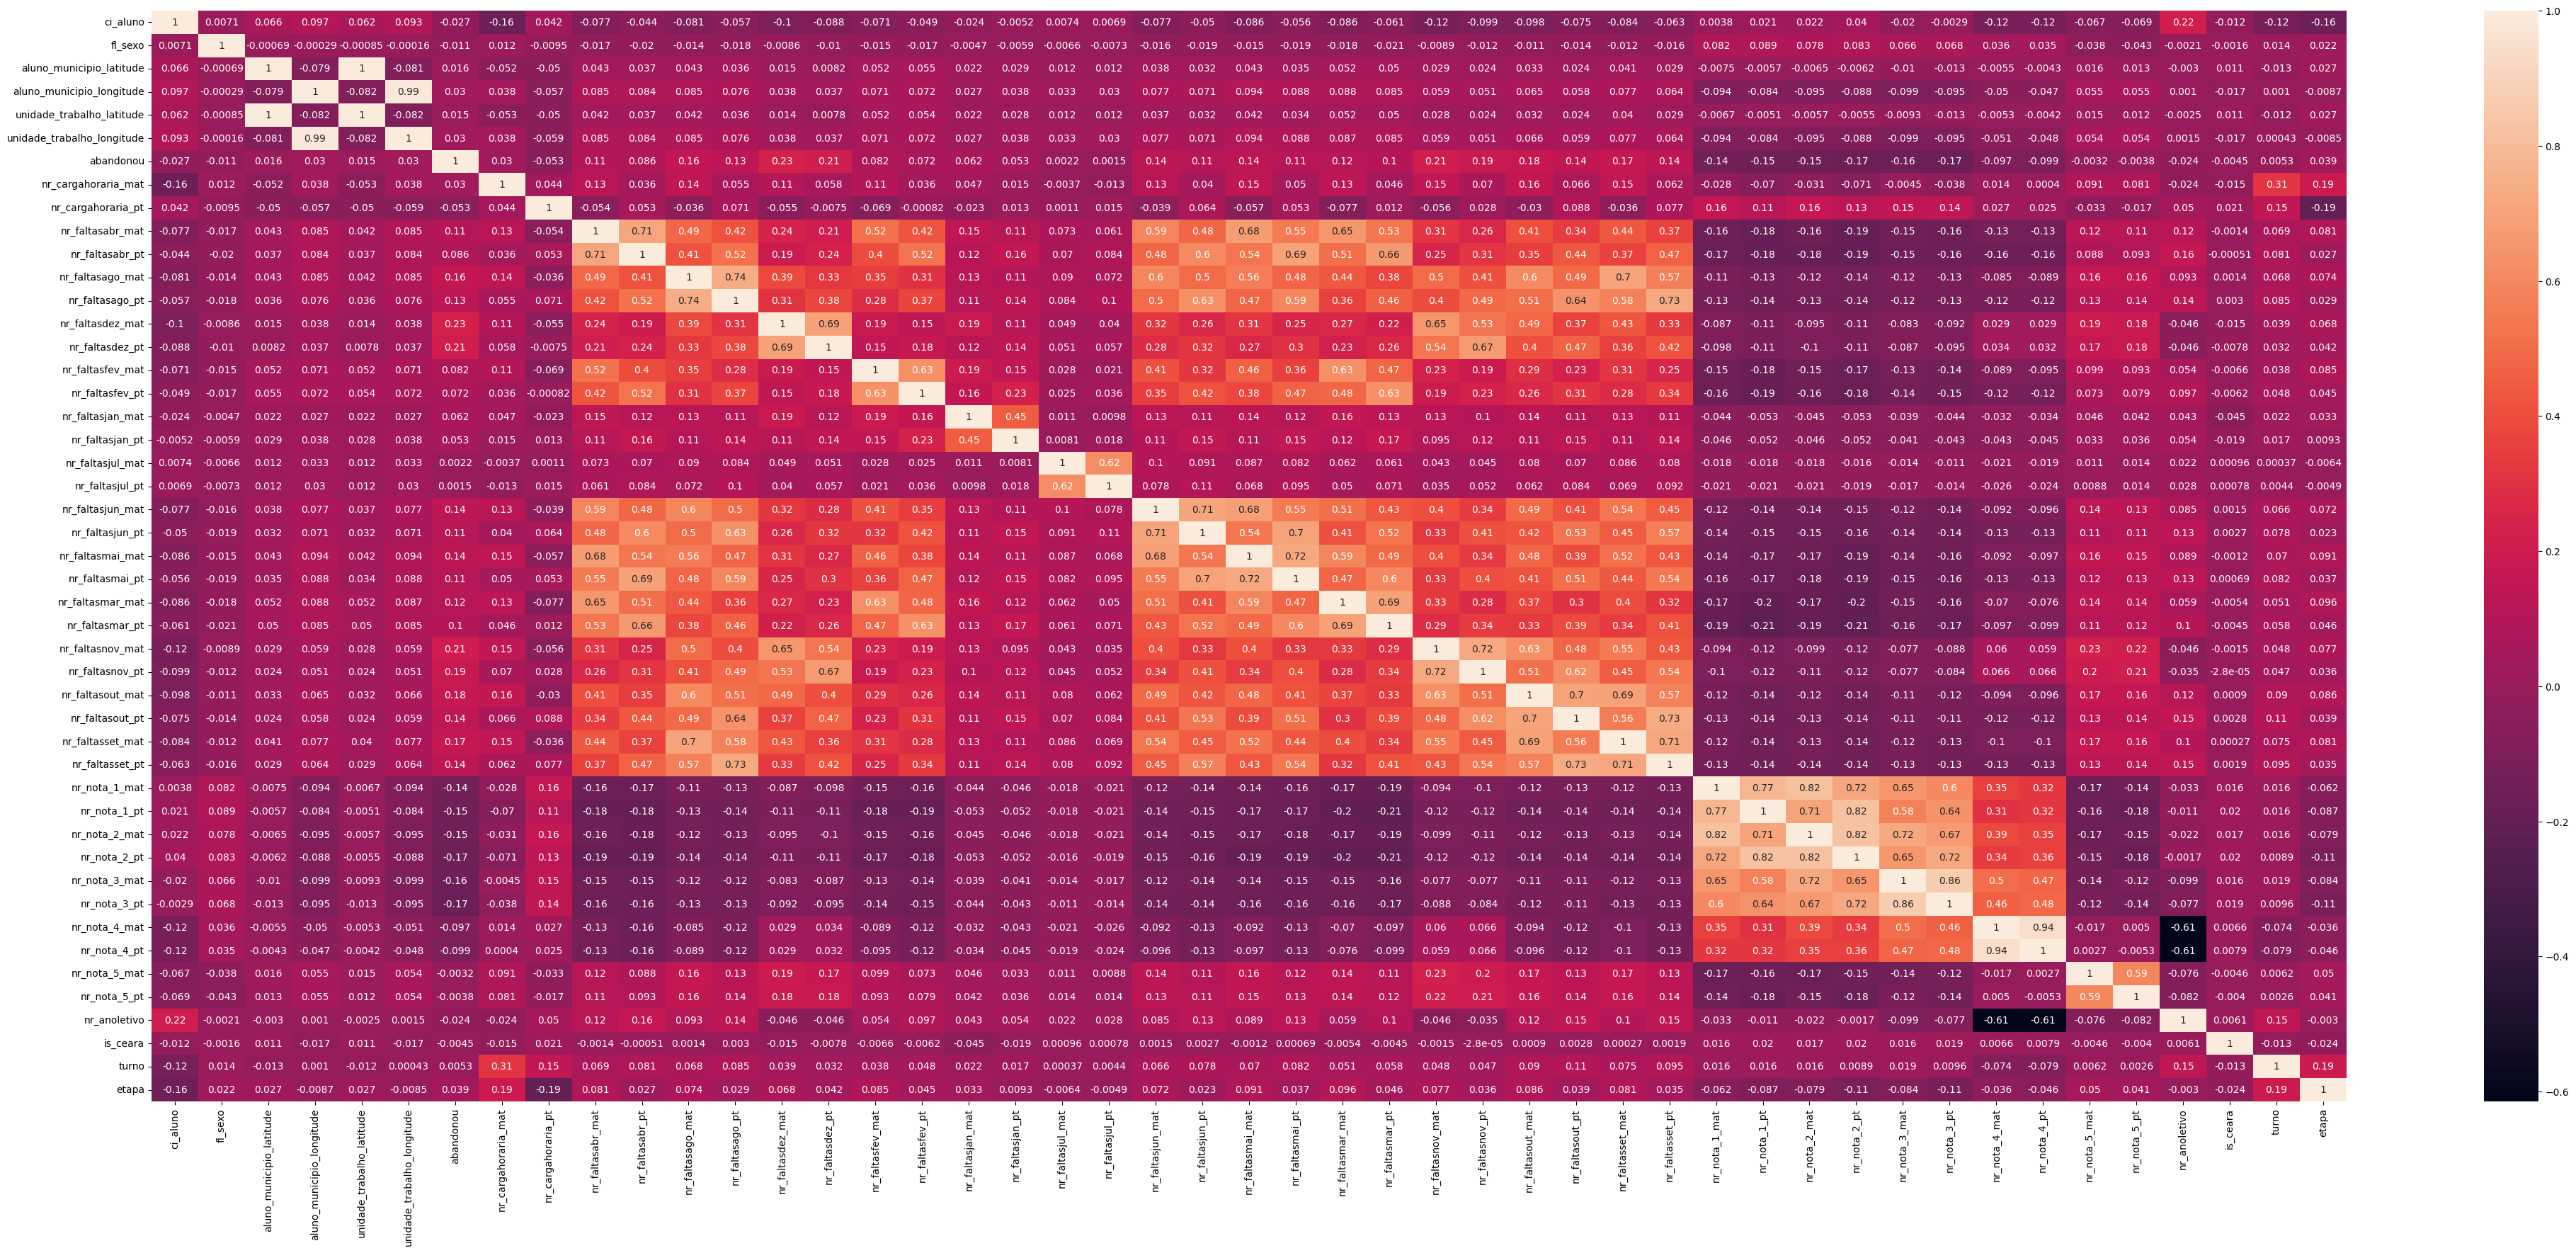

In [28]:
#  matriz de correlação sem a coluna situacao
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Agrupamento das faltas do mês por período pois elas tem um coorrelação alta para reduzir a dimensionalidade

In [29]:
columns_faltas  = [col for col in df.columns if 'nr_faltas' in col]
columns_faltas

df['faltas_periodo_1_pt'] = df[['nr_faltasjan_pt', 'nr_faltasfev_pt', 'nr_faltasmar_pt']].sum(axis=1)
df['faltas_periodo_2_pt'] = df[['nr_faltasabr_pt', 'nr_faltasmai_pt', 'nr_faltasjun_pt']].sum(axis=1)
df['faltas_periodo_3_pt'] = df[['nr_faltasjul_pt', 'nr_faltasago_pt', 'nr_faltasset_pt']].sum(axis=1)
df['faltas_periodo_4_pt'] = df[['nr_faltasout_pt', 'nr_faltasnov_pt', 'nr_faltasdez_pt']].sum(axis=1)

df['faltas_periodo_1_mat'] = df[['nr_faltasjan_mat', 'nr_faltasfev_mat', 'nr_faltasmar_mat']].sum(axis=1)
df['faltas_periodo_2_mat'] = df[['nr_faltasabr_mat', 'nr_faltasmai_mat', 'nr_faltasjun_mat']].sum(axis=1)
df['faltas_periodo_3_mat'] = df[['nr_faltasjul_mat', 'nr_faltasago_mat', 'nr_faltasset_mat']].sum(axis=1)
df['faltas_periodo_4_mat'] = df[['nr_faltasout_mat', 'nr_faltasnov_mat', 'nr_faltasdez_mat']].sum(axis=1)

df.drop(columns=columns_faltas, inplace=True)

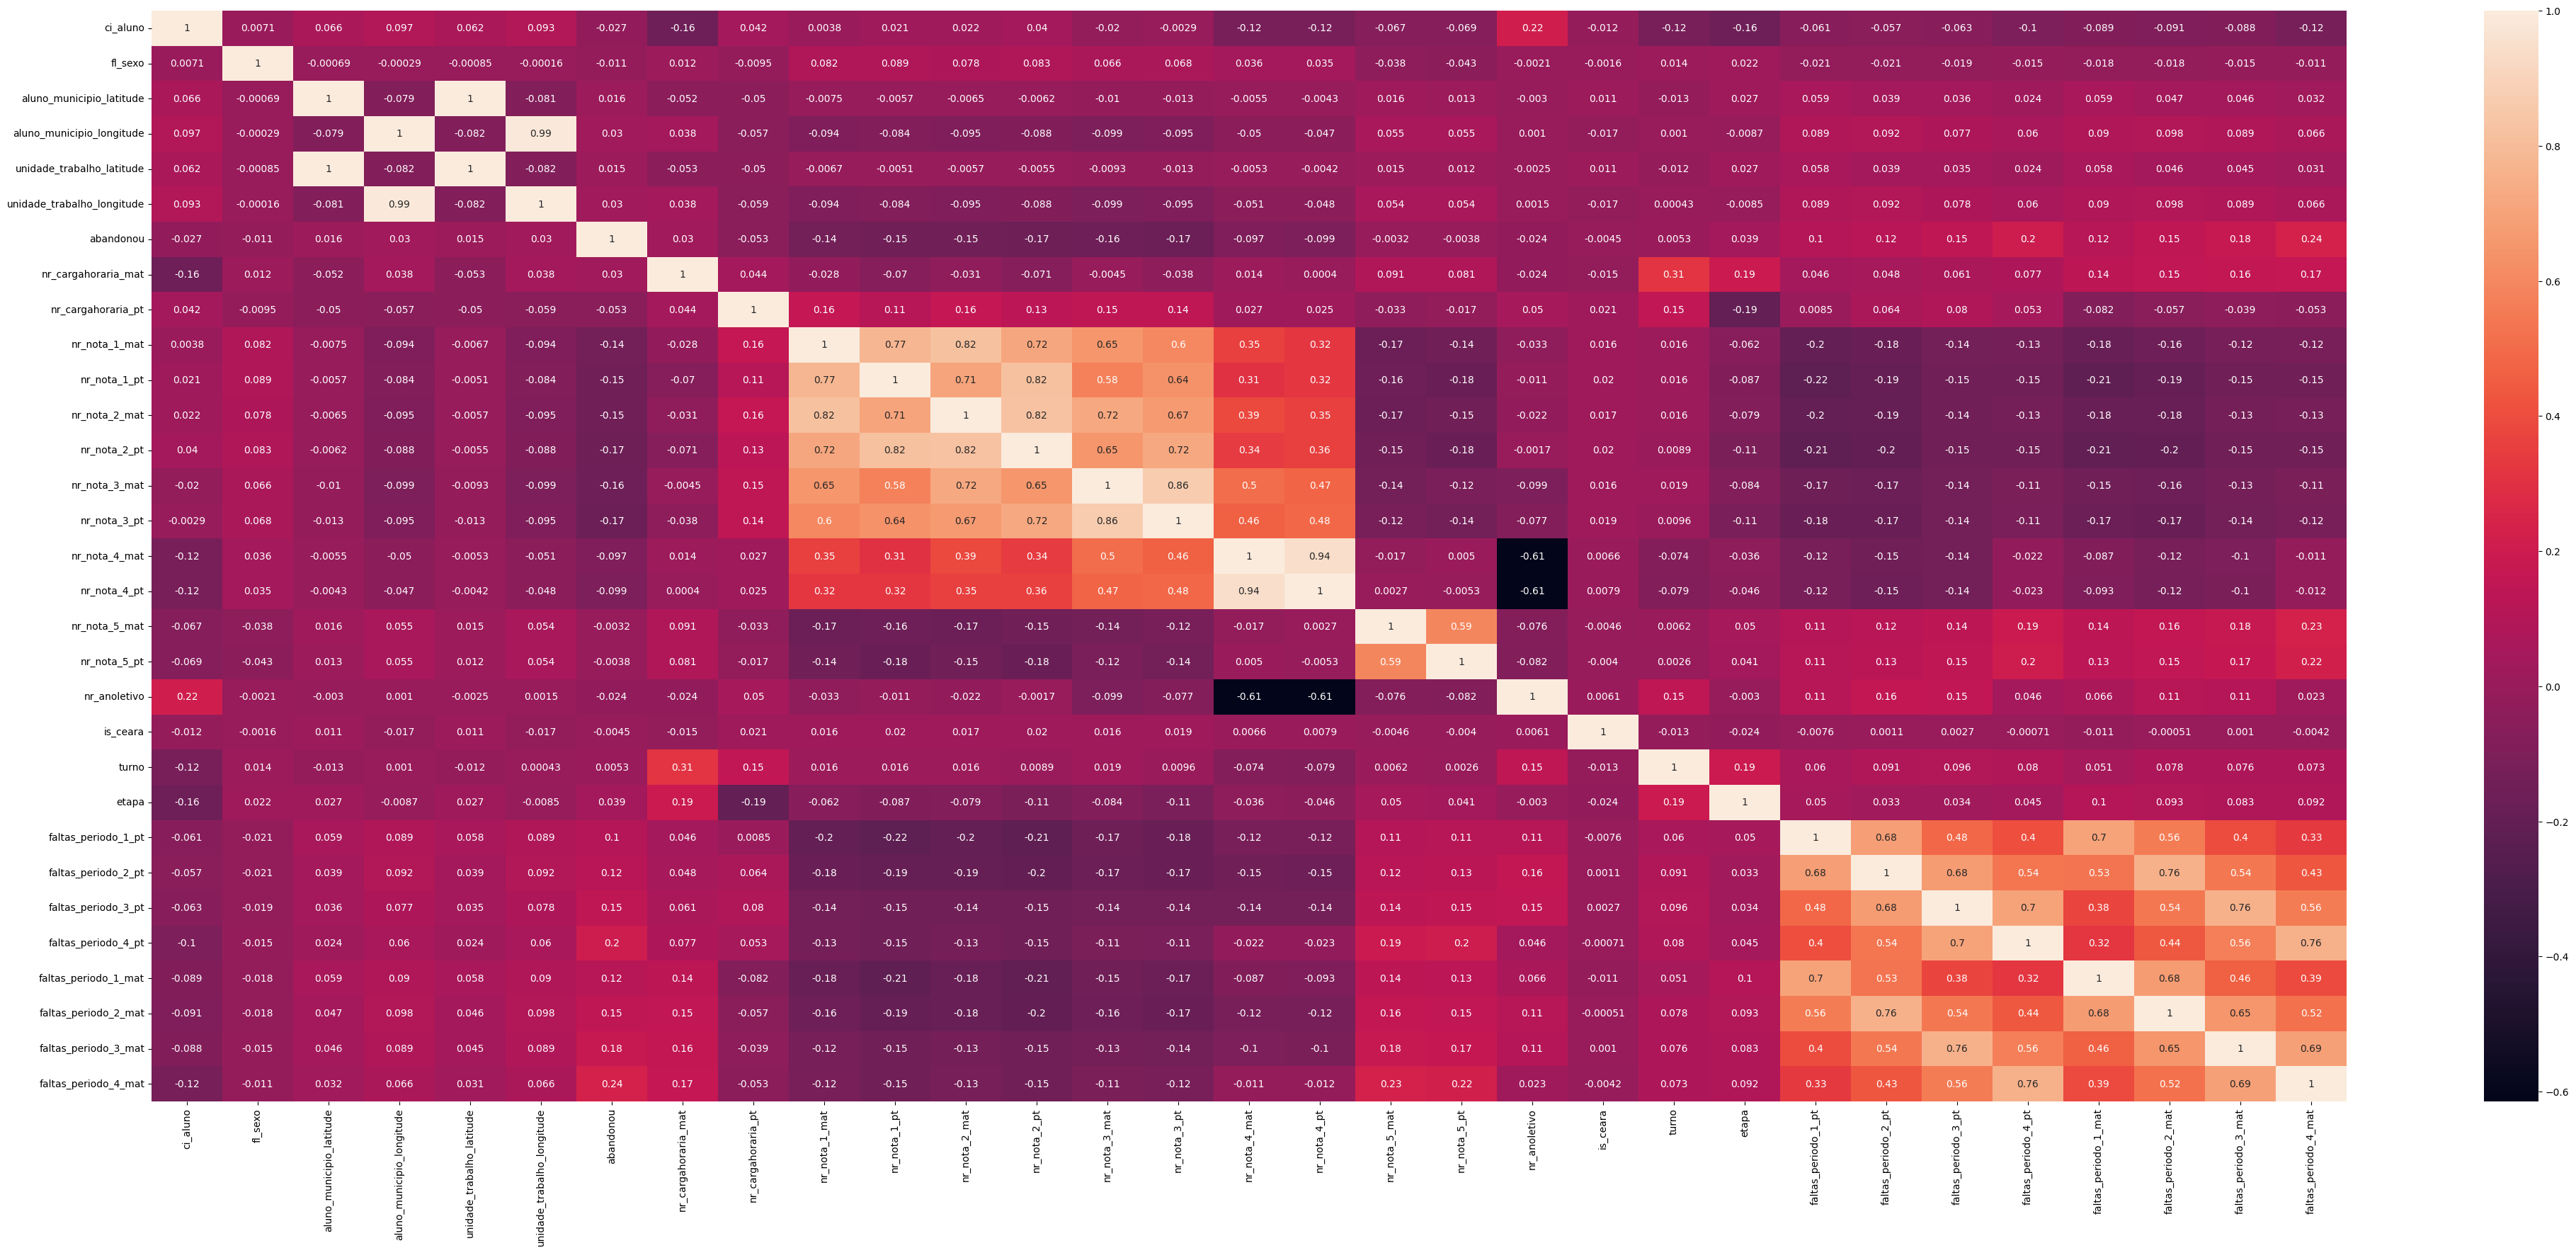

In [30]:

plt.figure(figsize=(50, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Situação

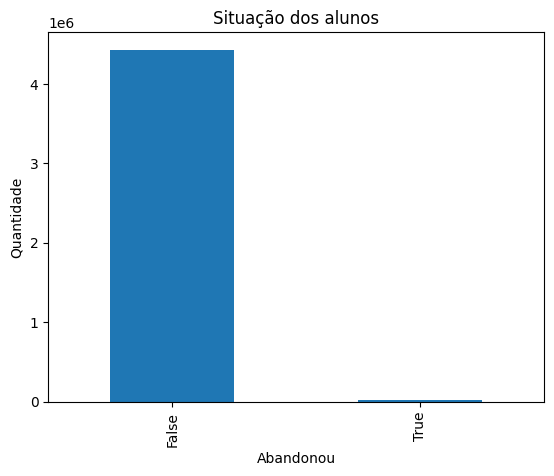

In [31]:
# gere graficos para analisar a distribuição dos dados
import matplotlib.pyplot as plt

df['abandonou'].value_counts().plot(kind='bar')
plt.title('Situação dos alunos')
plt.xlabel('Abandonou')
plt.ylabel('Quantidade')
plt.show()




### Distibruição das médias

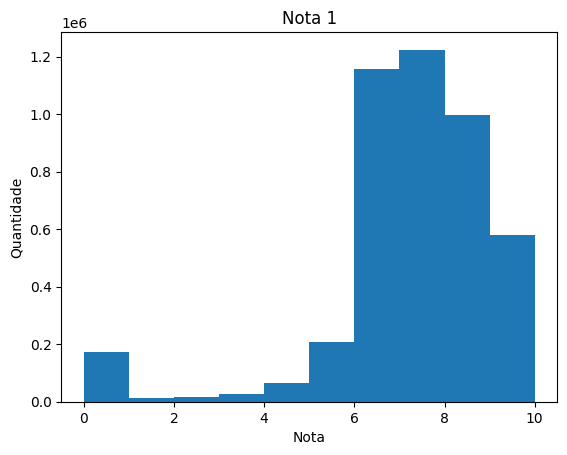

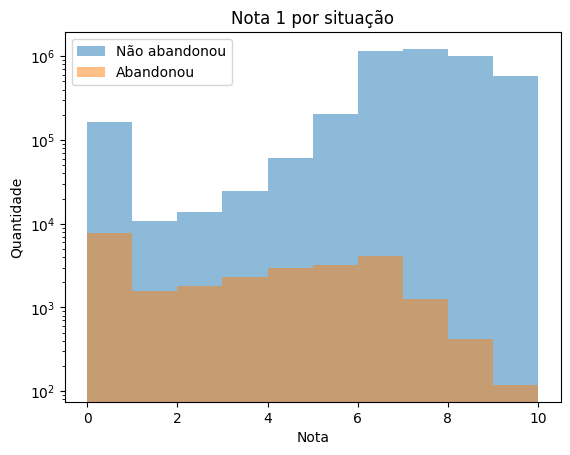

In [32]:

df['nr_nota_1_pt'].plot(kind='hist')
plt.title('Nota 1')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.show()

situacoes = df['abandonou'].unique()
# plot o grafico de médias separado por situação no mesmo gráfico

for situacao in situacoes:
    label = 'Abandonou' if situacao == 1 else 'Não abandonou'
    df[df['abandonou'] == situacao]['nr_nota_1_pt'].plot(kind='hist', alpha=0.5, label=label)
    
plt.title('Nota 1 por situação')
plt.yscale('log')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.legend()
plt.show()


## 3. Modelagem Preditiva
### Escolha de Modelos:

* Regressão Logística: Útil para prever uma variável binária, como se um aluno está em risco ou não.
* Árvores de Decisão e Florestas Aleatórias: Modelos que podem lidar bem com dados categóricos e fornecer uma interpretação clara sobre as decisões.
* Máquinas de Vetores de Suporte (SVM): Úteis para classificações em cenários complexos.
* Redes Neurais: Podem capturar relações não lineares complexas, mas requerem mais dados e poder computacional.

### Validação do Modelo:

* Divisão do Conjunto de Dados: Separar dados em conjuntos de treino e teste (e, se possível, um conjunto de validação).
* Cross-validation: Utilizar validação cruzada para garantir que o modelo não esteja superajustado.
* Métricas de Desempenho: Acurácia, precisão, recall, F1-score, AUC-ROC.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = df.drop(columns=['abandonou', 'ci_aluno'])
y = df['abandonou']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# trade off precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1328431
        True       0.88      0.70      0.78      7814

    accuracy                           1.00   1336245
   macro avg       0.94      0.85      0.89   1336245
weighted avg       1.00      1.00      1.00   1336245



### Encontrando o melhor threshold

In [60]:
threshold = 0.32
def predict_custom_threshold(X_test, clf):
    y_probs = clf.predict_proba(X_test)[:, 1]
    y_pred_custom = (y_probs >= threshold).astype(bool)
    return y_pred_custom

y_pred_custom = predict_custom_threshold(X_test, clf)
# Avaliação com o threshold personalizado
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1328431
        True       0.81      0.81      0.81      7814

    accuracy                           1.00   1336245
   macro avg       0.90      0.90      0.90   1336245
weighted avg       1.00      1.00      1.00   1336245



### Gráfico de precision vs recall

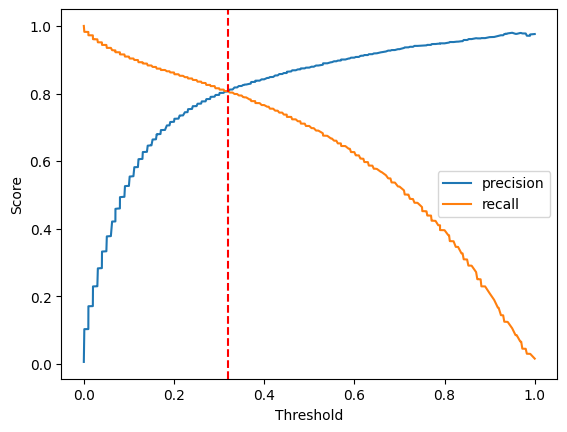

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.axvline(x=threshold, color='r', linestyle='--')
plt.show()



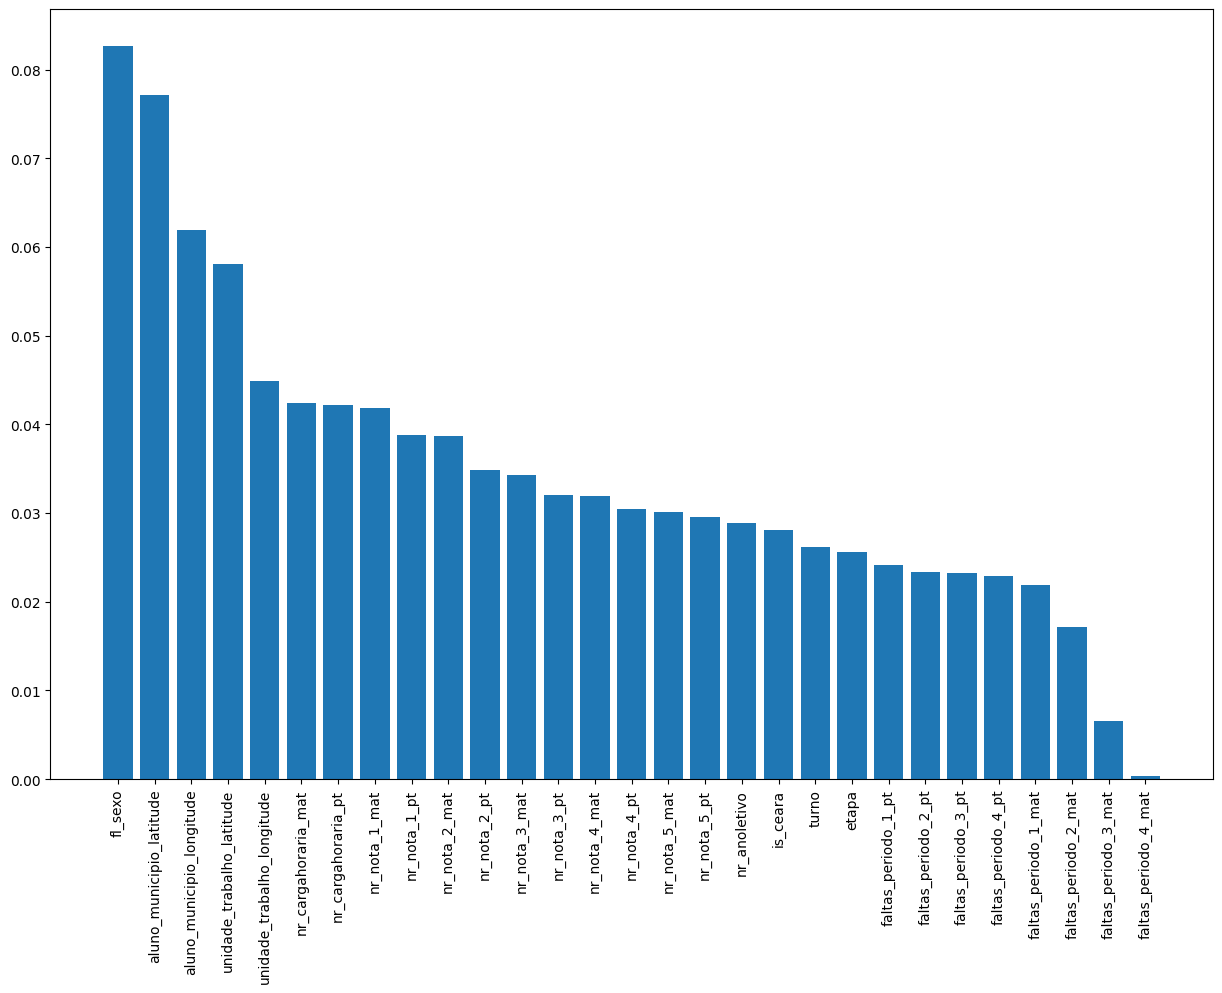

In [50]:
# plote a importancia das features
plt.figure(figsize=(15, 10))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X.columns, importances[indices])
plt.xticks(rotation=90)
plt.show()

In [59]:
# use o modelo para prever a situação de um aluno
print('Previsao para aluno que não abandonou')
X_new = X[y == 0].sample()
# y_new = clf.predict(X_new)
y_new = predict_custom_threshold(X_new, clf)
print('Situação prevista', y_new)
print('Situação real', y.loc[X_new.index])

# pegue um exemplo que o real seja true e faça a previsão
print('\nPrevisao para aluno que abandonou')
X_new = X[y == 1].sample()
# y_new = clf.predict(X_new)
y_new = predict_custom_threshold(X_new, clf)
print('Situação prevista', y_new)
print('Situação real', y.loc[X_new.index])


Previsao para aluno que não abandonou
Situação prevista [False]
Situação real 907152    False
Name: abandonou, dtype: bool

Previsao para aluno que abandonou
Situação prevista [ True]
Situação real 971096    True
Name: abandonou, dtype: bool


### Matriz de confusao dos resultados

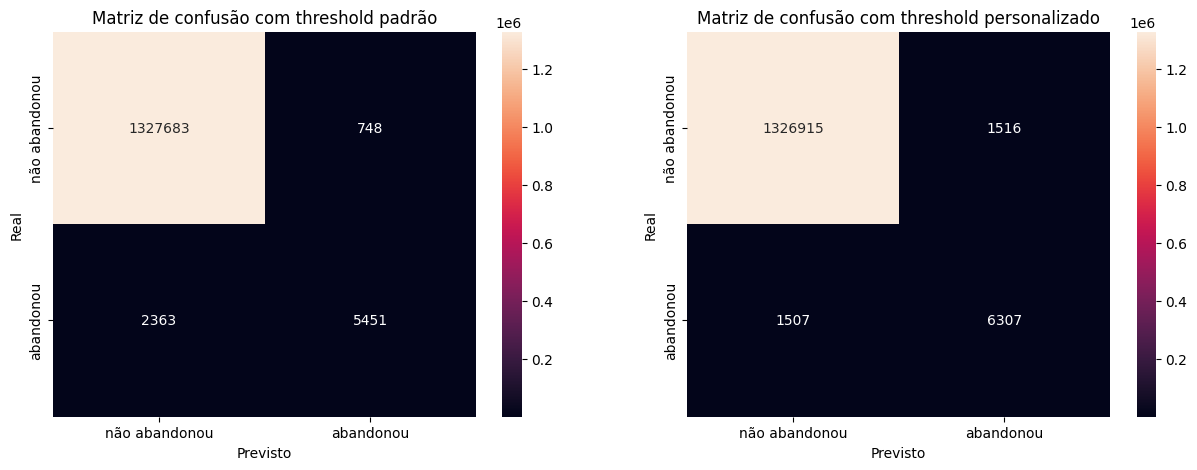

Matriz de confusão com threshold padrão
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1328431
        True       0.88      0.70      0.78      7814

    accuracy                           1.00   1336245
   macro avg       0.94      0.85      0.89   1336245
weighted avg       1.00      1.00      1.00   1336245


Matriz de confusão com threshold personalizado
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1328431
        True       0.81      0.81      0.81      7814

    accuracy                           1.00   1336245
   macro avg       0.90      0.90      0.90   1336245
weighted avg       1.00      1.00      1.00   1336245



In [63]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['não abandonou', 'abandonou'], yticklabels=['não abandonou', 'abandonou'])
plt.title('Matriz de confusão com threshold padrão')
plt.xlabel('Previsto')
plt.ylabel('Real')

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['não abandonou', 'abandonou'], yticklabels=['não abandonou', 'abandonou'])
plt.title('Matriz de confusão com threshold personalizado')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print( 'Matriz de confusão com threshold padrão')
print(classification_report(y_test, y_pred))

print('\nMatriz de confusão com threshold personalizado')
print(classification_report(y_test, y_pred_custom))
